In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("ptbdb_abnormal.csv")
df2 = pd.read_csv("mitbih_train.csv")

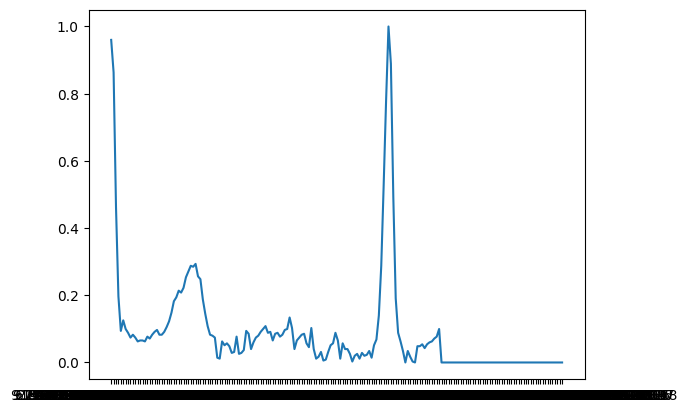

In [20]:
plt.plot(df2.iloc[0])

In [21]:
df2 = df2.drop(labels=[87550,87551,87552])

In [22]:
train = np.array(df2)

In [23]:
train = train.reshape(-1,188*10)

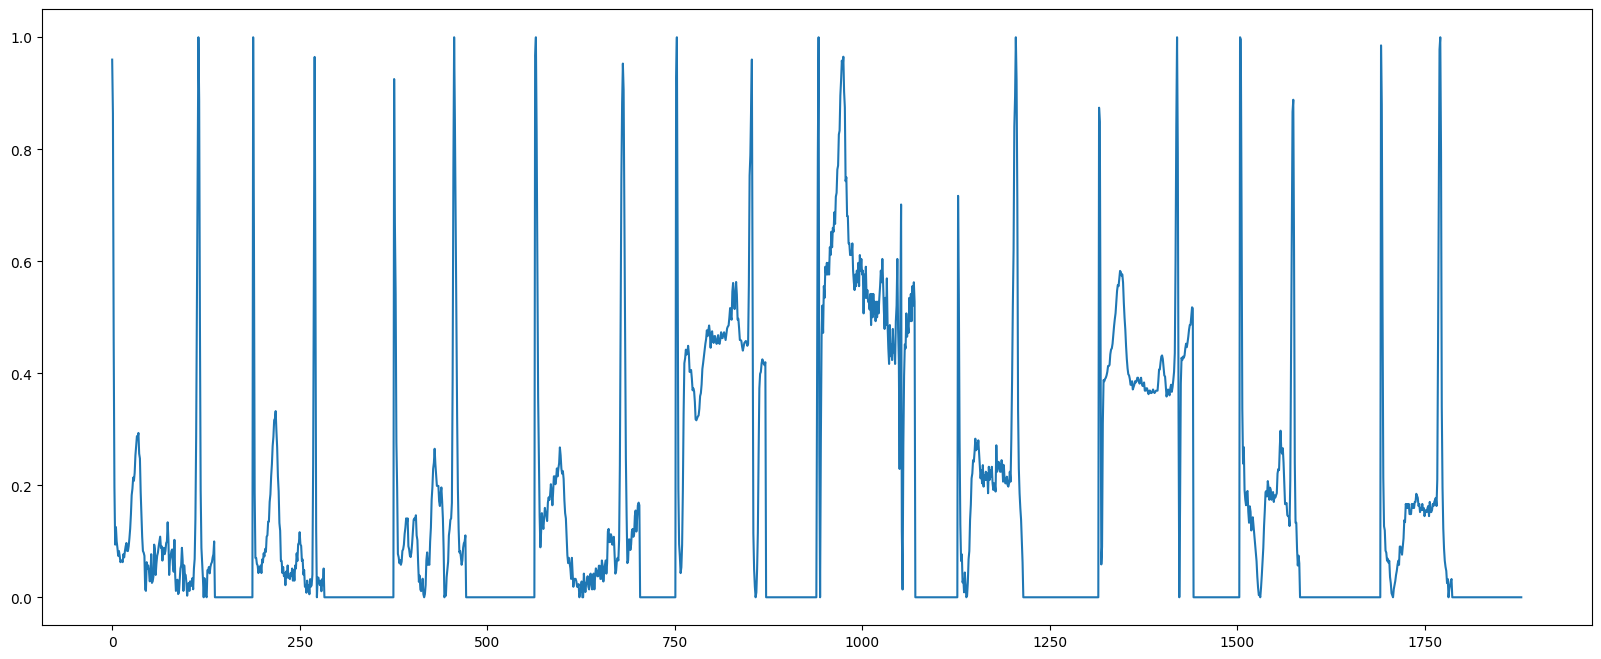

In [24]:
plt.figure(figsize=(20,8))
plt.plot(train[0])

In [25]:
x = [0,1,2,3,4,5,6,7,8,9]

In [48]:
a = np.random.random() * (max(x)-min(x))
n1 = []
n2 = []
for i in x:
    if i < a:
        n1.append(i)
    elif i >= a:
        n2.append(i)

print(a)
print(n1)
print(n2)

3.180436349616456
[0, 1, 2, 3]
[4, 5, 6, 7, 8, 9]


In [61]:
def select_feature(data):
    return random.choice(data.columns)

In [62]:
def select_value(data,feat):
    mini = data[feat].min()
    maxi = data[feat].max()
    return (maxi-mini)*np.random.random()+mini

In [63]:
def split_data(data, split_column, split_value):
    data_below = data[data[split_column] <= split_value]
    data_above = data[data[split_column] >  split_value]

    return data_below, data_above

In [64]:
def isolation_tree(data,counter=0, max_depth=50,random_subspace=False):

    # End Loop if max depth or isolated
    if (counter == max_depth) or data.shape[0]<=1:
        classification = classify_data(data)
        return classification

    else:
        # Counter
        counter +=1

        # Select feature
        split_column = select_feature(data)

        # Select value
        split_value = select_value(data,split_column)
        # Split data
        data_below, data_above = split_data(data,split_column,split_value)

        # instantiate sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}

        # Recursive part
        below_answer = isolation_tree(data_below, counter,max_depth=max_depth)
        above_answer = isolation_tree(data_above, counter,max_depth=max_depth)

        if below_answer == above_answer:
            sub_tree = below_answer
        else:
            sub_tree[question].append(below_answer)
            sub_tree[question].append(above_answer)

        return sub_tree

In [70]:
def isolation_forest(df,n_trees=5, max_depth=5, subspace=256):
    forest = []
    for i in range(n_trees):
        # Sample the subspace
        if subspace<=1:
            df = df.sample(frac=subspace)
        else:
            df = df.sample(subspace)
        # Fit tree
        tree = isolation_tree(df,max_depth=max_depth)

        # Save tree to forest
        forest.append(tree)
    return forest

In [72]:
def pathLength(example,iTree,path=0,trace=False):
    # Initialize question and counter
    path=path+1
    question = list(iTree.keys())[0]
    feature_name, comparison_operator, value = question.split()


    # ask question
    if example[feature_name].values <= float(value):
        answer = iTree[question][0]
    else:
        answer = iTree[question][1]

    # base case
    if not isinstance(answer, dict):
        return path

    # recursive part
    else:
        residual_tree = answer
        return pathLength(example, residual_tree,path=path)
    return path

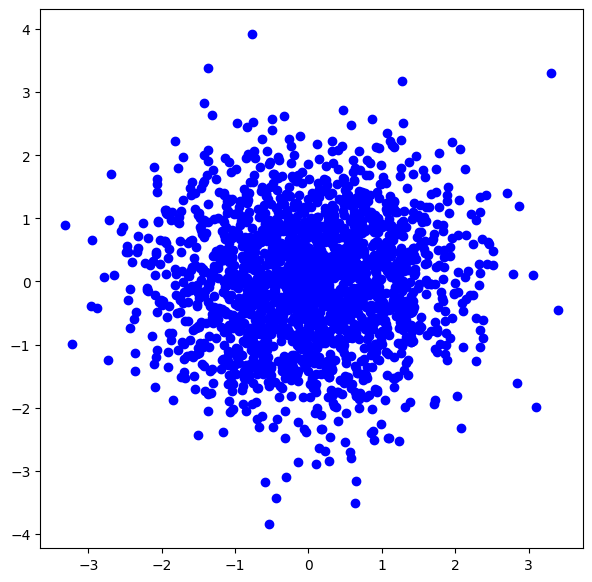

In [73]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 2000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
X = pd.DataFrame(X,columns=['feat1','feat2'])
plt.figure(figsize=(7,7))
plt.plot(x,y,'bo');

In [76]:
iForest = isolation_forest(X,n_trees=20, max_depth=100, subspace=256)
# Evaluate one instance
def evaluate_instance(instance,forest):
    paths = []
    for tree in forest:
        paths.append(pathLength(instance,tree))
    return paths

NameError: name 'random' is not defined